Running Gradient Descent
Running Nesterov
Running Adagrad
Running RMSProp
Running Adam


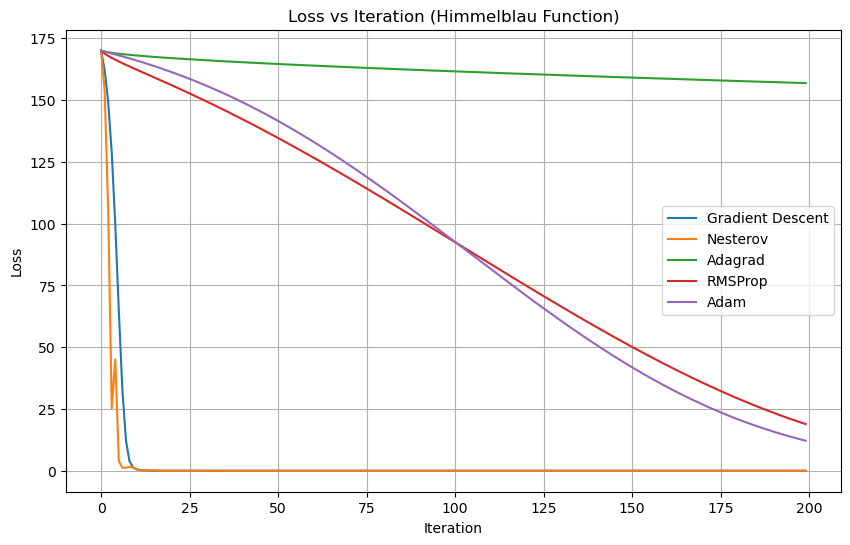

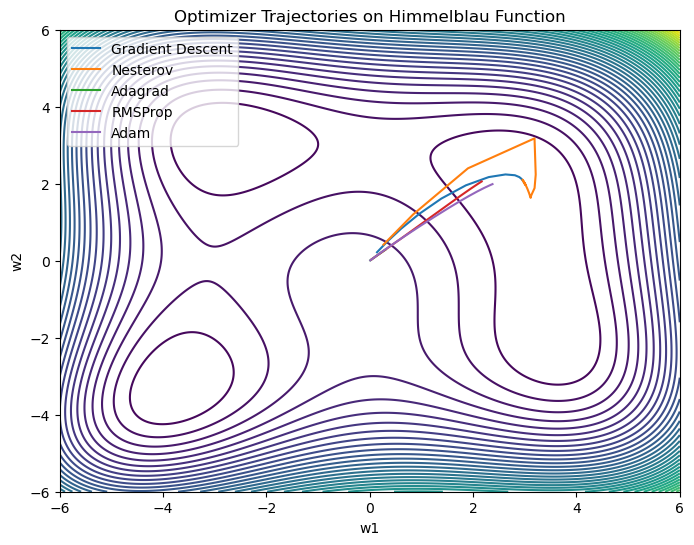

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


# 1. Define Himmelblau Function
def himmelblau(w):
    w1 = w[0]
    w2 = w[1]
    return (w1**2 + w2 - 11)**2 + (w1 + w2**2 - 7)**2

# TensorFlow version
def tf_himmelblau(w):
    w1 = w[0]
    w2 = w[1]
    return (w1**2 + w2 - 11)**2 + (w1 + w2**2 - 7)**2

# 2. Training Function
def optimize(optimizer, iterations=200):

    # SAME INITIAL POINT for all optimizers
    w = tf.Variable([0.0, 0.0], dtype=tf.float32)

    w_history = []
    loss_history = []

    for i in range(iterations):
        with tf.GradientTape() as tape:
            loss = tf_himmelblau(w)

        grads = tape.gradient(loss, [w])
        optimizer.apply_gradients(zip(grads, [w]))

        w_history.append(w.numpy().copy())
        loss_history.append(loss.numpy())

    return np.array(w_history), np.array(loss_history)

# 3. Define Optimizers
lr = 0.01

optimizers = {
    "Gradient Descent": tf.keras.optimizers.SGD(learning_rate=lr),
    "Nesterov": tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.9, nesterov=True),
    "Adagrad": tf.keras.optimizers.Adagrad(learning_rate=lr),
    "RMSProp": tf.keras.optimizers.RMSprop(learning_rate=lr),
    "Adam": tf.keras.optimizers.Adam(learning_rate=lr)
}

results = {}

for name, opt in optimizers.items():
    print(f"Running {name}")
    w_hist, loss_hist = optimize(opt)
    results[name] = {"w": w_hist, "loss": loss_hist}

# 4. Plot Loss vs Iteration
plt.figure(figsize=(10,6))
for name in results:
    plt.plot(results[name]["loss"], label=name)

plt.title("Loss vs Iteration (Himmelblau Function)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# 5. Contour Plot + Optimizer Trajectories
w1 = np.linspace(-6, 6, 400)
w2 = np.linspace(-6, 6, 400)
W1, W2 = np.meshgrid(w1, w2)

Z = (W1**2 + W2 - 11)**2 + (W1 + W2**2 - 7)**2

plt.figure(figsize=(8,6))
plt.contour(W1, W2, Z, levels=50)

for name in results:
    w_hist = results[name]["w"]
    plt.plot(w_hist[:,0], w_hist[:,1], label=name)

plt.title("Optimizer Trajectories on Himmelblau Function")
plt.xlabel("w1")
plt.ylabel("w2")
plt.legend()
plt.show()
